In [7]:
import serial
import time
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

1 <class 'int'>
写总字节数： 15
['3', '61', '61', '218']
[['3', '61', '61', '218']]
2 <class 'int'>
写总字节数： 15
['4', '61', '61', '218']
[['3', '61', '61', '218'], ['4', '61', '61', '218']]
3 <class 'int'>
写总字节数： 15
['7', '61', '61', '218']
[['3', '61', '61', '218'], ['4', '61', '61', '218'], ['7', '61', '61', '218']]
4 <class 'int'>
写总字节数： 15
['16', '61', '61', '218']
[['3', '61', '61', '218'], ['4', '61', '61', '218'], ['7', '61', '61', '218'], ['16', '61', '61', '218']]
5 <class 'int'>
写总字节数： 15
['16', '61', '61', '218']
[['3', '61', '61', '218'], ['4', '61', '61', '218'], ['7', '61', '61', '218'], ['16', '61', '61', '218'], ['16', '61', '61', '218']]
6 <class 'int'>
写总字节数： 15
['11', '61', '61', '218']
[['3', '61', '61', '218'], ['4', '61', '61', '218'], ['7', '61', '61', '218'], ['16', '61', '61', '218'], ['16', '61', '61', '218'], ['11', '61', '61', '218']]
7 <class 'int'>
写总字节数： 15
['15', '61', '61', '218']
[['3', '61', '61', '218'], ['4', '61', '61', '218'], ['7', '61', '61', '218'], ['

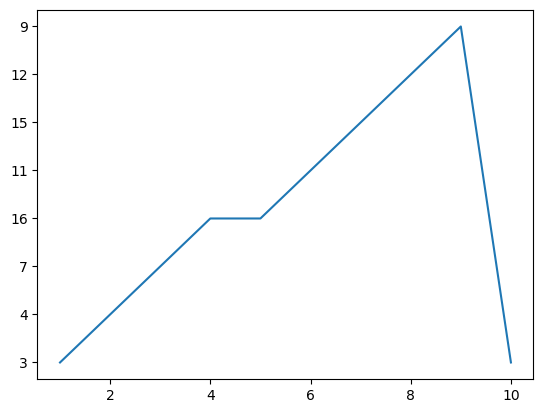

In [8]:
NO=['']
n=0
s=True
POWER_DATA=[]
while s:
    portx="COM1"
    #波特率，标准值之一：50，75，110，134，150，200，300，600，1200，1800，2400
    bps=115200
    #超时设置，None：永远等待操作，0为立即返回请求结果，其他值为等待超时
    timex=1
    #打开串口，并得到串口对象
    ser=serial.Serial(portx,bps,timeout=timex)
    data1=ser.readline().decode("gbk")
    if data1 !='':
        #读一个字节//read.hex()
        n+=1
        print(n,type(n))
        text="数据"+str(n)+"已经收到\r\n"
        result=ser.write(text.encode("gbk"))
        print("写总字节数：",result)
        data1=data1.rstrip('\r\n')
        data=data1.split(',')
        print(data)
        POWER_DATA.append(data)
        print(POWER_DATA)
        if n==10:
            s=0
            #POWER_DATA.clear()
            #print(POWER_DATA)
    ser.close() #关闭串口

    time.sleep(0.1)
#其他常用操作
#print(ser.read()) 读一个字节
#print(ser.read(10).decode("gbk"))读十个字节
#print(ser.readline().decode("gbk"))读一行
#print(ser.readlines())#读取多行，返回列表，必须匹配超时timeout使用
#print(ser.in_waiting)#获取输入缓冲区的剩余字节数
#print(ser.out_waiting)#获取输出缓冲区的字节数
def draw(a):
    y=[]
    for i in a:
        print(i[0])#选取每组数据的第一列
        y.append(i[0])
    #print(type(i[0]))

    x=np.linspace(1,10,10,endpoint=True)
    plt.plot(np.array(x),np.array(y))
    print('ok')
    plt.show()
draw(POWER_DATA)